In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("D:\Jupyter_notebook_ws\BE Project Machine Learning\Diabetes\Dataset of Diabetes .csv")
df.sample(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
554,104,34432,M,60,5.6,74,2.0,5.2,2.0,1.6,1.8,1.0,33.0,Y
262,772,34322,F,55,2.7,52,8.0,4.6,1.7,1.0,2.9,0.8,30.0,Y
870,30,6546,M,55,6.1,80,8.5,5.6,2.1,0.9,3.8,0.4,26.0,Y
256,224,24046,M,73,4.3,79,6.9,5.3,1.4,1.5,3.2,0.6,28.0,Y
156,12,23975,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y


In [3]:
#Our CLASS column contains some whitespaces which is results 'Y ' and 'N '
df['CLASS']=df['CLASS'].str.strip()

In [282]:
df['CLASS']=df['CLASS'].replace({'N':0,'P':1,'Y':2}).astype('int64')  #{'N':0,'P':1,'Y':2}
df['Gender']=df['Gender'].replace({'M':0,'F':1,'f':1}).astype('int64')
dropped=['ID','No_Pation']
df=df.drop(dropped,axis=1)
# print(df['CLASS'].unique())  used to identify the types in class
# print(df['Gender'].unique())
df.sample(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
202,1,49,4.3,53,4.2,4.2,1.1,1.1,2.7,0.5,25.0,2
919,1,36,2.8,39,8.6,6.2,3.3,1.5,4.1,1.4,24.0,2
98,0,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,0
620,1,52,5.3,45,9.0,5.7,3.3,3.6,1.5,1.0,38.0,2
880,1,61,3.7,51,6.5,6.4,1.8,3.2,2.5,0.8,30.0,2


<Axes: xlabel='CLASS', ylabel='count'>

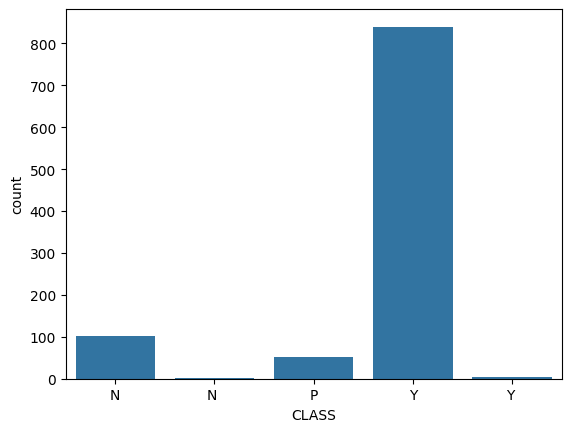

In [5]:
sns.countplot(x='CLASS',data=df)

In [6]:
# df.duplicated().sum()
# df.isnull().sum()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


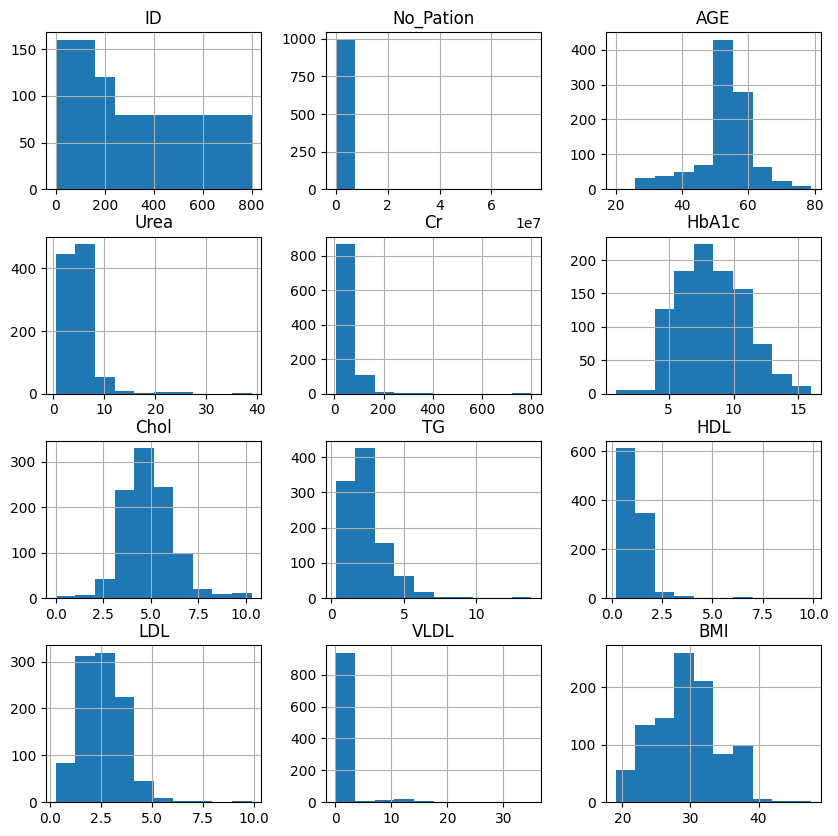

In [8]:
# Using Histogram to check wether our classes are skewed or not
df.hist(bins=10,figsize=(10,10))
plt.show()

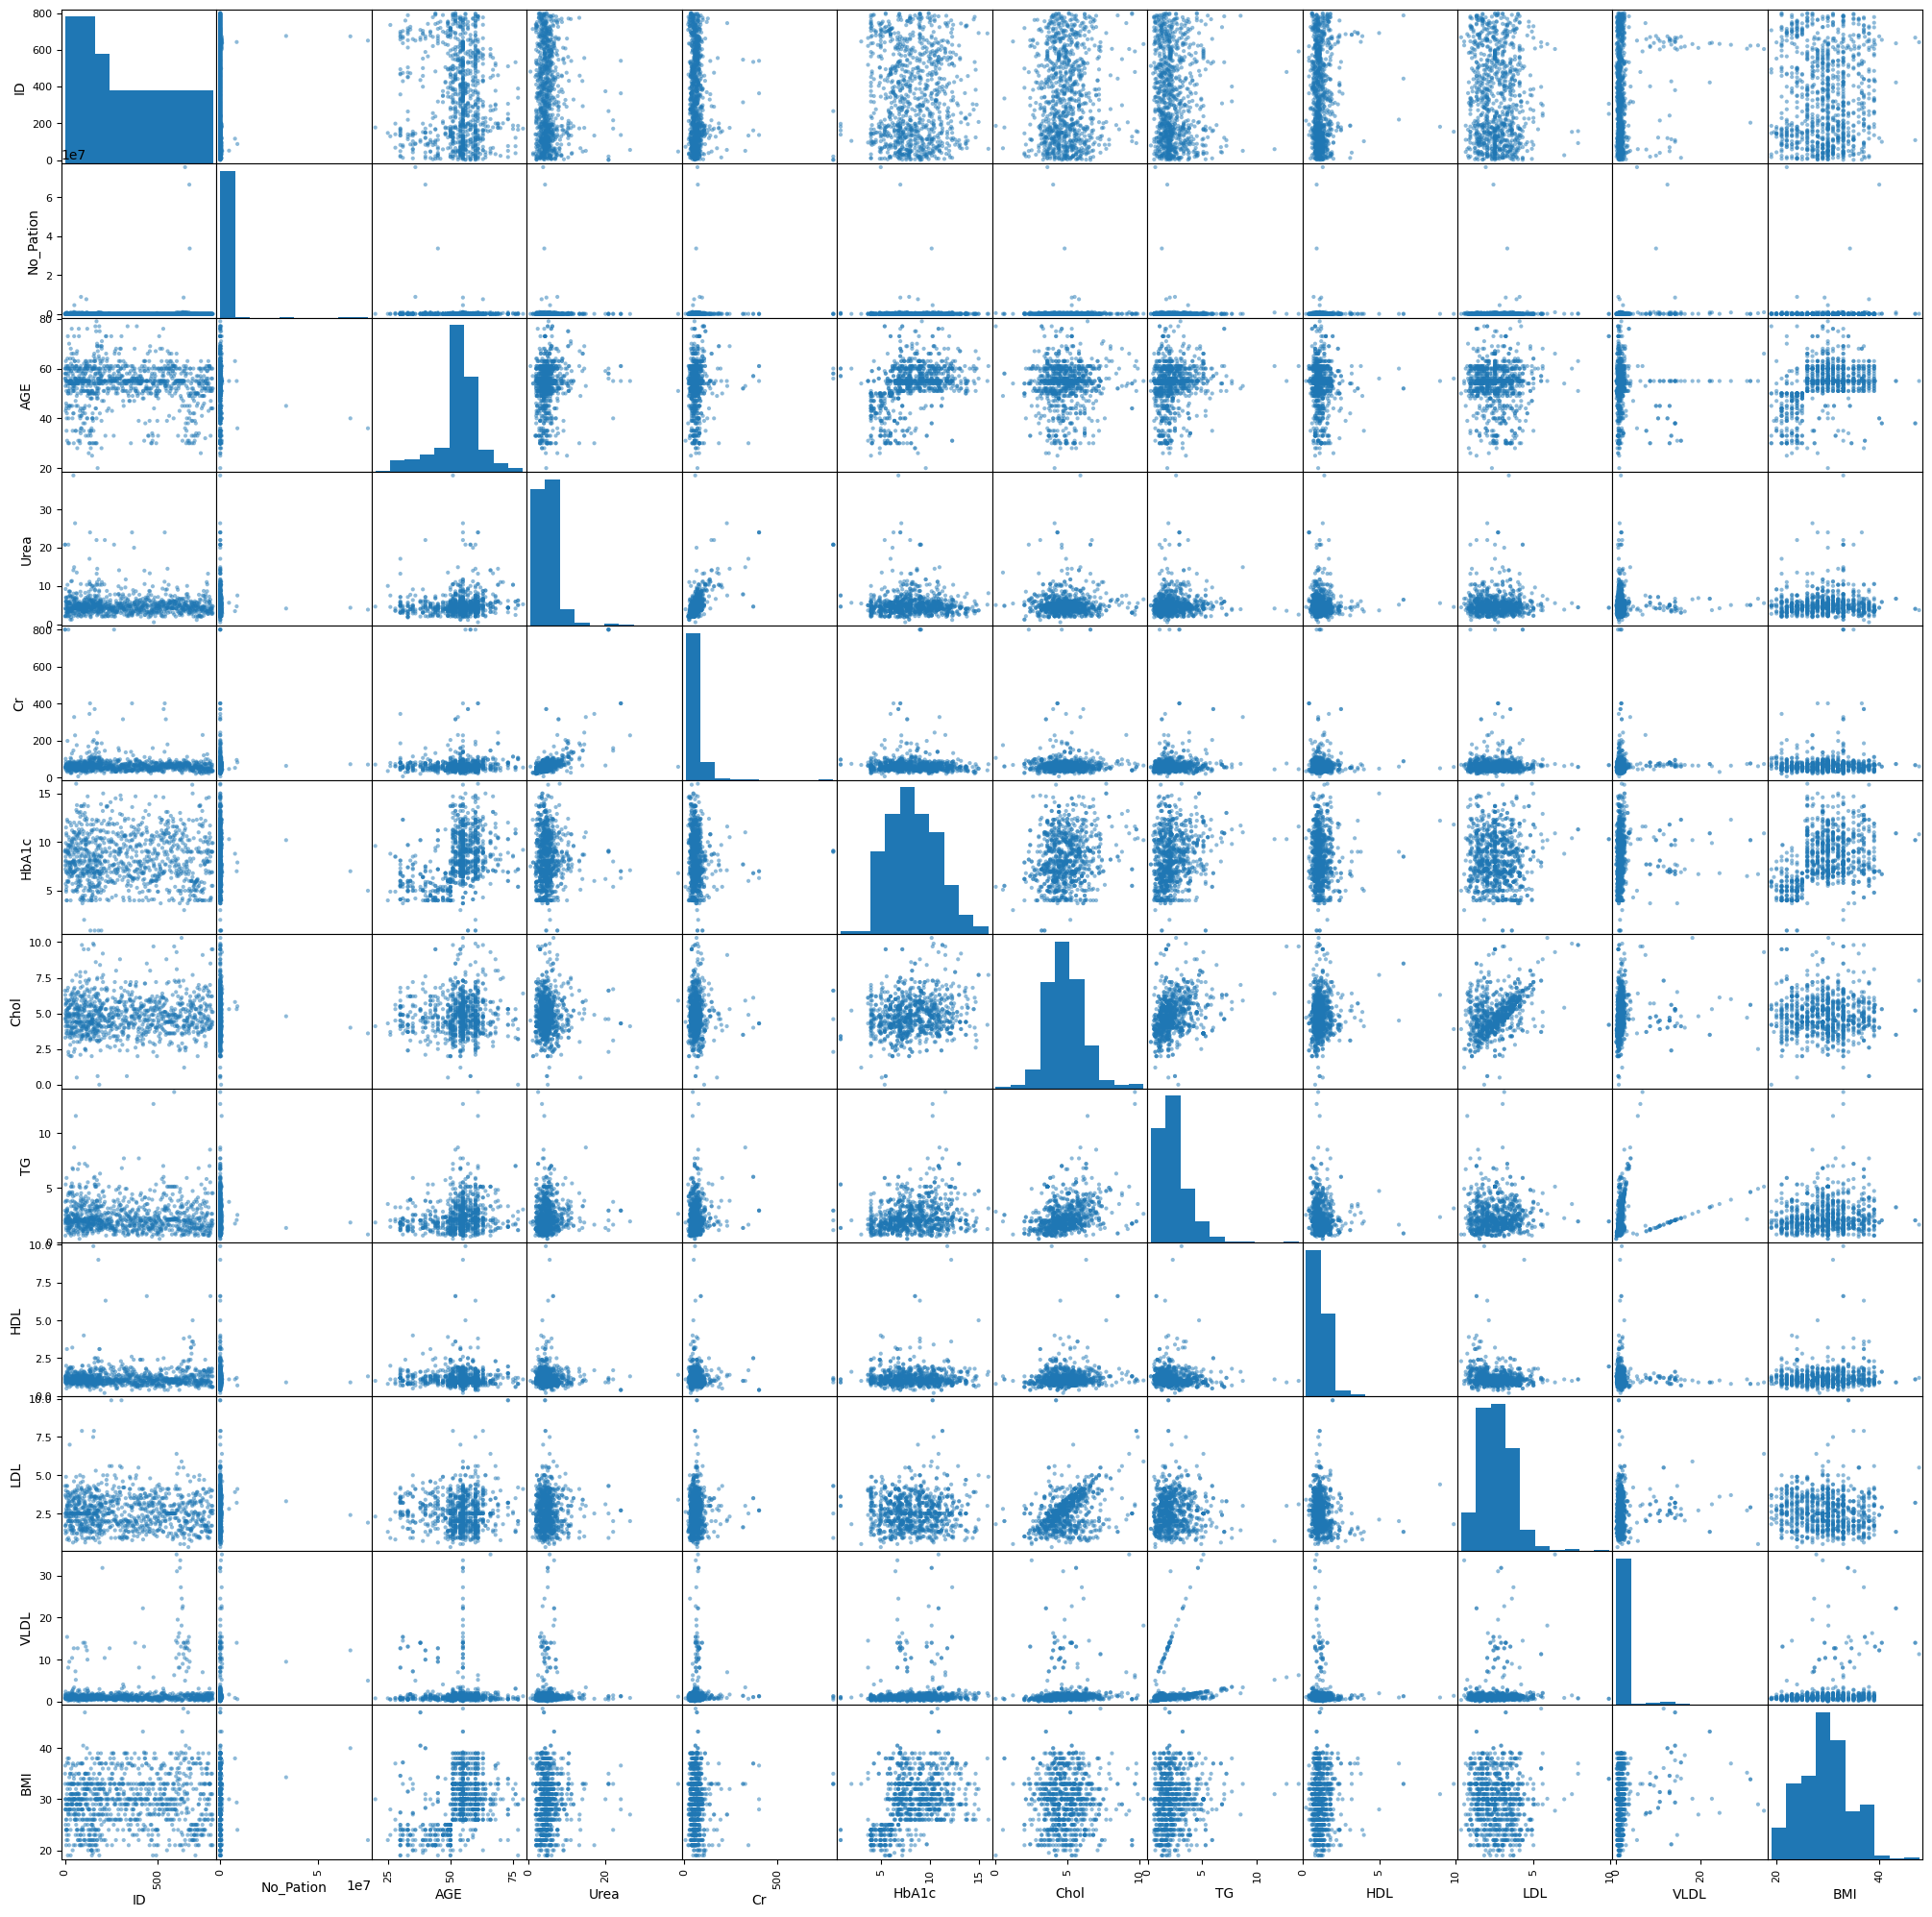

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,25))
plt.show()

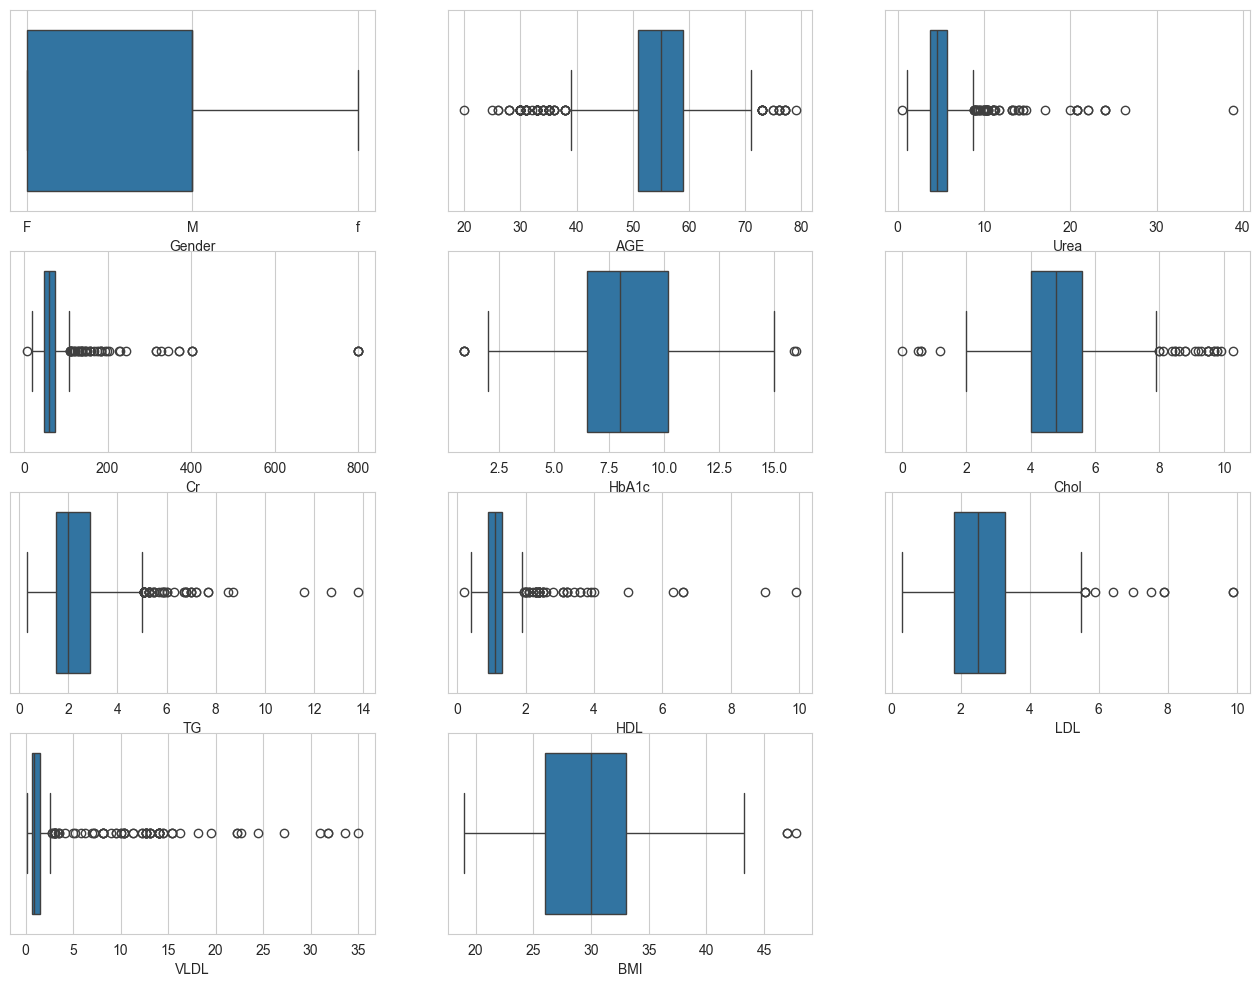

In [10]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

features=['Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
row,column=4,3

for i,feature in enumerate(features):
    plt.subplot(row,column,i+1)
    sns.boxplot(x=feature,data=df)

In [14]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

ValueError: could not convert string to float: 'F'

In [290]:
from sklearn.preprocessing import QuantileTransformer
x=df.drop(columns=['CLASS']) 
y=df['CLASS']
quantile=QuantileTransformer(n_quantiles=724)
X=quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X,columns=x.columns)
# df_new.columns=['Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
df=pd.concat([df_new,y.reset_index(drop=True)],axis=1)
# y_df=pd.DataFrame(y)
df.sample(10)

C:\Users\Omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
827,0.0,0.532503,0.941217,0.616874,0.540111,0.778008,0.698479,0.067082,0.923237,0.605118,0.954357,2
198,0.0,0.094053,0.425311,0.725450,0.336100,0.235823,0.394191,0.253112,0.432918,0.963874,0.992862,2
609,0.0,0.905947,0.612725,0.570539,0.930844,0.136238,0.954357,0.253112,0.489627,0.441217,0.531120,2
175,0.0,0.145228,0.051867,0.157676,0.111342,0.377593,0.270401,0.392808,0.607884,0.096819,0.203320,2
696,1.0,0.807746,0.733748,0.725450,0.412863,0.377593,0.554633,0.538728,0.489627,0.441217,0.249654,2
867,1.0,0.532503,0.768326,0.144537,0.702628,0.587137,0.923237,0.538728,0.383817,0.890733,0.365837,2
929,0.0,0.686722,0.360304,0.686030,0.652144,0.706086,0.153527,0.392808,0.872752,0.096819,0.681189,2
728,1.0,0.807746,0.157676,0.878976,0.797372,0.446750,0.894191,0.253112,0.657676,0.858921,0.978562,2
294,1.0,0.876902,0.425311,0.417704,0.925311,0.377593,0.487552,0.392808,0.489627,0.441217,0.432918,2
762,0.0,0.807746,0.820194,0.066390,0.553250,0.798064,0.746888,0.004149,0.657676,0.816736,0.681189,2


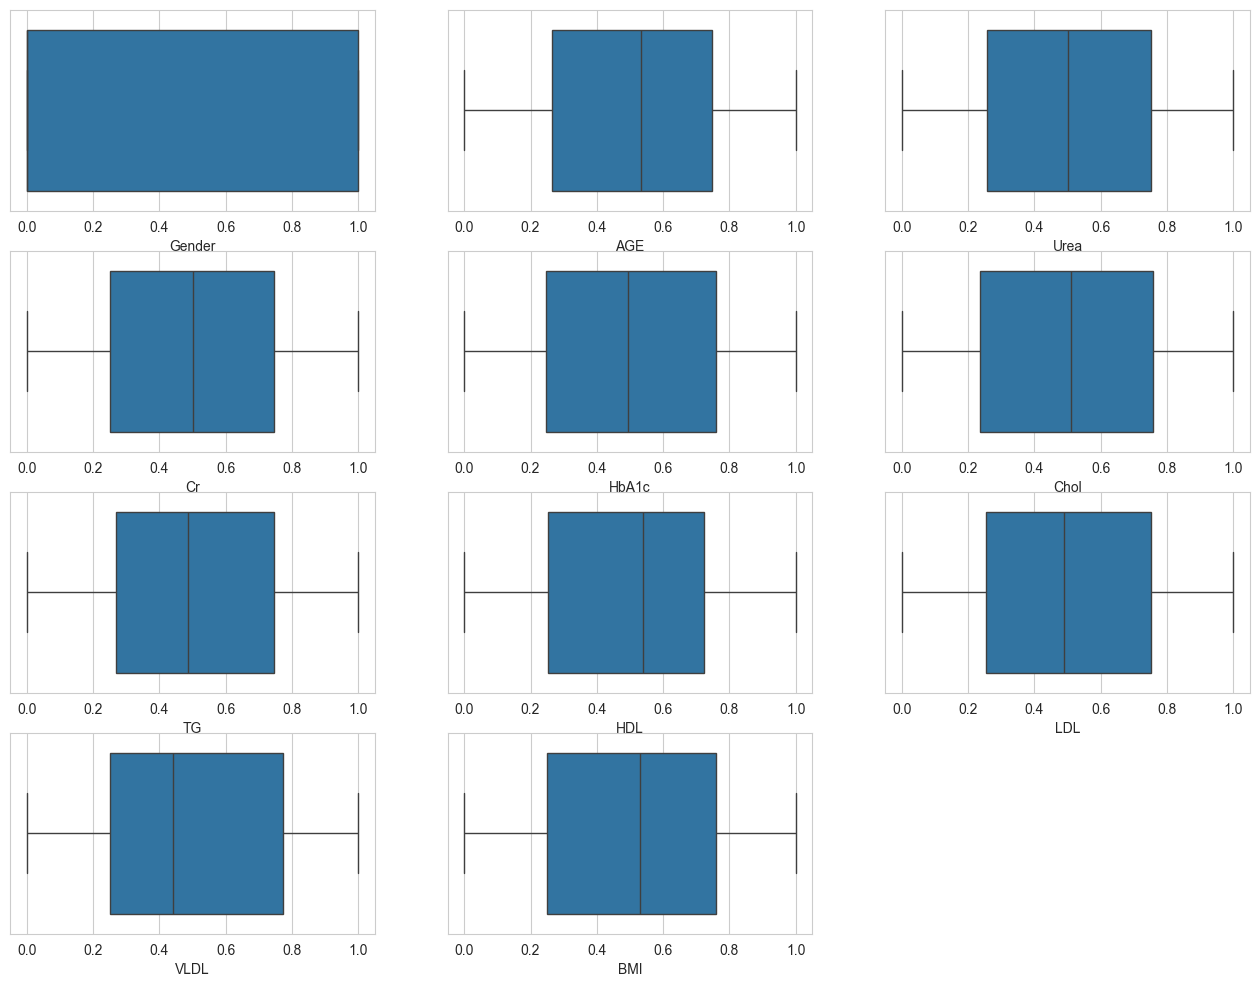

In [291]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

features=['Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
row,column=4,3

for i,feature in enumerate(features):
    plt.subplot(row,column,i+1)
    sns.boxplot(x=feature,data=df)

<Axes: >

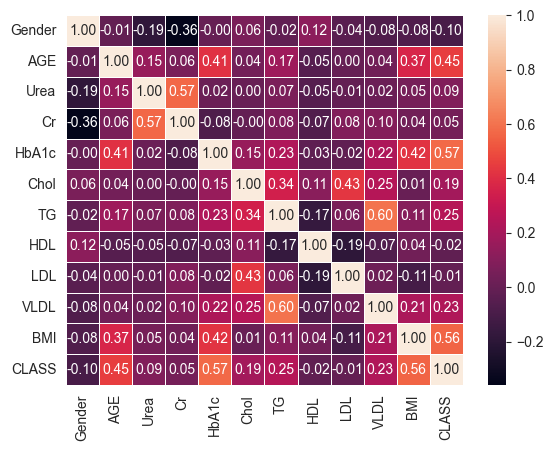

In [292]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5)

In [293]:
df=df.drop(columns=['Gender','Cr','HDL','LDL'])

In [294]:
df.sample(10)

,AGE,Urea,HbA1c,Chol,TG,VLDL,BMI,CLASS
234,0.748271,0.275934,0.190871,0.309129,0.487552,0.726833,0.954357,2
675,0.923928,0.392808,0.663900,0.377593,0.554633,0.441217,0.249654,2
6,0.216459,0.016598,0.024896,0.136238,0.195712,0.164592,0.157676,0
442,0.748271,0.221300,0.494467,0.890041,0.719225,0.020055,0.849931,2
171,0.216459,0.325726,0.977870,0.377593,0.487552,0.441217,0.432918,2
517,0.400415,0.863762,0.685339,0.856155,0.634855,0.774550,0.531120,2
45,0.185339,0.752420,0.071071,0.636238,0.118257,0.251729,0.035961,0
865,0.807746,0.694329,0.311895,0.136238,0.049793,0.050484,0.365837,2
681,0.686722,0.752420,0.226141,0.636238,0.698479,0.648686,0.531120,2
926,0.532503,0.694329,0.289073,0.309129,0.860996,0.840249,0.818811,2


sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5)

In [295]:
df.to_csv('cleaned_dataset_of_diabetes.csv')

In [ ]:
df.tail(10)